In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#import pandas as pd
import keras

In [5]:
keras.backend.backend()

'tensorflow'

In [9]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 102s 23us/step


In [10]:
x_train.shape
#there are 60000 images and each image is 28x28 pixels

(60000, 28, 28)

In [16]:
x_test.shape

(10000, 28, 28)

In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

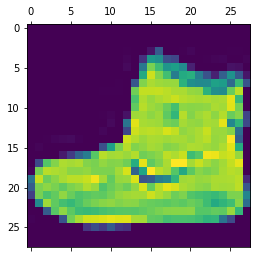

In [12]:
plt.matshow(x_train[0])
#shows the corresponding image

In [13]:
#shows corresponding label
y_train[0]

9

In [14]:
#normalize our dataset,our dataset is 0-255 which is colour range so we want to normalize it to 1
x_train= x_train/255
y_train= y_train/255

In [15]:
x_train[1]
#now values are in range 0-1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

In [17]:
#now lets start building model
from keras.models import Sequential #sequential is a linear stack of layers
from keras.layers import Flatten, Dense, Activation #flatten is converting 2-D array to 1-D array

In [54]:
#create a model
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [55]:
#we will build a model with one input layer
#add is function to add a layer with shape as 28x28 pixel

#now lets make other layer which is called dense layer.this is our hidden layer.
#number of neurons we can give by hit and trial way

#softmax is a function that takes as input a vector of K real numbers, and normalizes it into a probability distribution
#after applying softmax, each component will be in the interval {\displaystyle (0,1)}(0,1),
#and the components will add up to 1, so that they can be interpreted as probabilities.

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [91]:
#compile the model
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])
#loss helps with our calculation
#optimizer helps to adjust with the weights of edges while training
#metrics what kind of metric we want to use

In [95]:
#we use fit function for training
model.fit(x_train, y_train,epochs=3)#epochs is for iterations

Epoch 1/3
60000/60000 [==============================] - 3s 50us/step - loss: 1.0730e-06 - acc: 0.1000
Epoch 2/3
60000/60000 [==============================] - 3s 50us/step - loss: 1.0729e-06 - acc: 0.1000
Epoch 3/3
60000/60000 [==============================] - 3s 49us/step - loss: 1.0729e-06 - acc: 0.1000


In [98]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 22us/step


[14.506287045288087, 0.1]

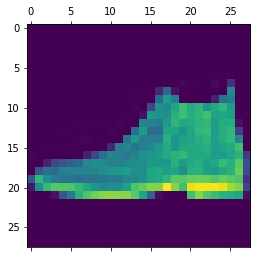

In [105]:
#now our model is ready for predictions
plt.matshow(x_test[0])

In [79]:
#x_test[1]

In [70]:
#y_test[1]

In [100]:
x_test.shape

(10000, 28, 28)

In [110]:
a= model.predict(x_test)#this will give me y predicted of 10,000 images

In [111]:
np.argmax(a[0])

0

In [107]:
yp.shape

(10000, 10)

In [86]:
#np.argmax(yp[3])

0

In [87]:
model.evaluate(x_test,y_test)#shows loss and accuracy

10000/10000 [==============================] - 0s 18us/step


[14.506287045288087, 0.1]

In [88]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [90]:
class_labels[np.argmax(yp[3])]

'T-shirt/top'